In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
df= pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
# # Standardize the 'Amount' and 'Time' columns
# scaler = StandardScaler()
# df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
# df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

In [7]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
X = df.drop('Class', axis=1)
y = df['Class']

In [9]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Class'] = y_resampled


In [10]:
!pip install imblearn


In [11]:
df_resampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,101656.122611,0.754547,1.174211,-4.593699,2.070887,-0.382978,-2.138747,-1.660996,0.124362,0.254114,...,0.431938,-0.007397,-0.206457,-0.272794,0.389612,-0.526184,0.506112,0.246973,137.551833,1
568626,102665.460404,-5.383150,5.161087,-7.535206,7.922785,-2.690810,-1.636194,-6.233633,2.891273,-4.397713,...,1.248756,0.470375,-0.112885,-0.509629,-0.138535,0.434544,-0.085982,-0.460684,0.070792,1
568627,122250.033255,-1.964009,1.307651,-3.075415,2.355000,-0.873232,-1.244009,-2.696205,-0.794105,-0.179124,...,1.450039,0.432779,0.615467,-0.092262,-0.153971,-0.354563,0.464025,0.072992,28.282394,1
568628,63674.752566,-1.671493,0.483103,-0.023224,1.750166,-1.210215,0.700351,0.216400,0.208778,-0.652309,...,0.439527,0.766476,0.327821,-0.636693,-0.029996,0.097861,-0.366728,0.007366,291.066742,1


In [12]:
df_resampled["Class"].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [13]:
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [14]:
rf_100 = RandomForestClassifier(n_estimators=10, random_state=42)
rf_100.fit(X_train_bal, y_train_bal)

# Make predictions on the test set
y_pred_bal = rf_100.predict(X_test_bal)

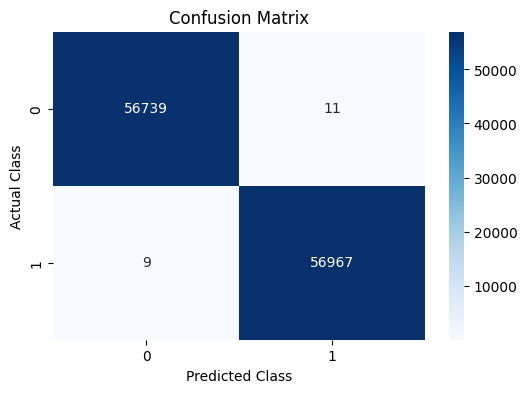

In [15]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test_bal, y_pred_bal)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [16]:
print(classification_report(y_test_bal, y_pred_bal))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



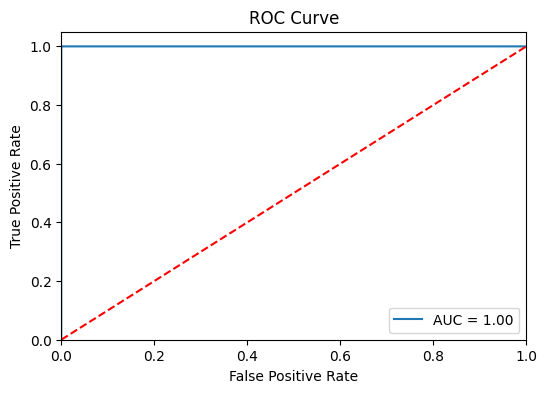

In [18]:
y_pred_prob = rf_100.predict_proba(X_test_bal)[:, 1]
fpr, tpr, _ = roc_curve(y_test_bal, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

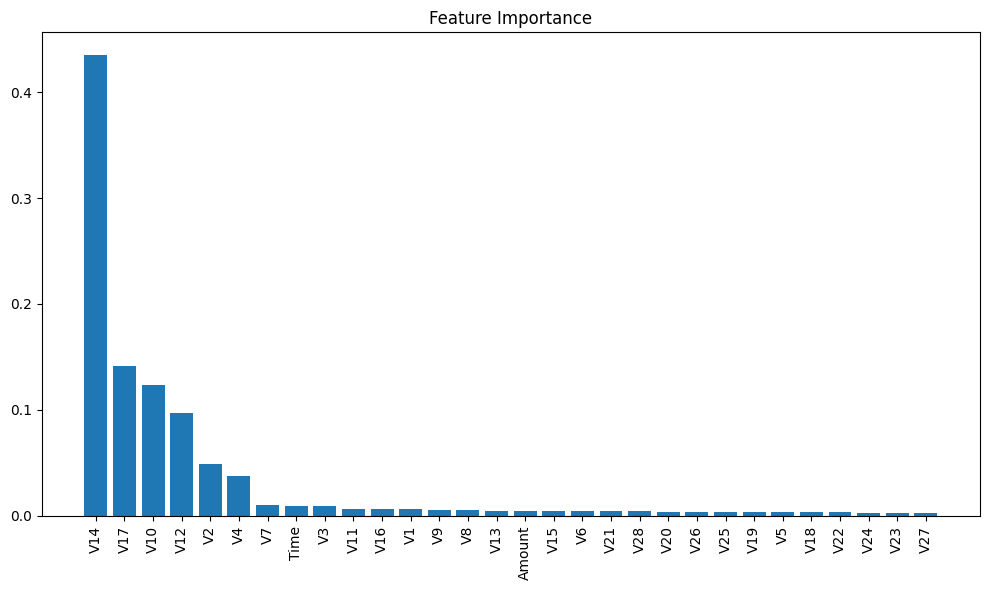

In [19]:
importances = rf_100.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

In [20]:
features[indices]

Index(['V14', 'V17', 'V10', 'V12', 'V2', 'V4', 'V7', 'Time', 'V3', 'V11',
       'V16', 'V1', 'V9', 'V8', 'V13', 'Amount', 'V15', 'V6', 'V21', 'V28',
       'V20', 'V26', 'V25', 'V19', 'V5', 'V18', 'V22', 'V24', 'V23', 'V27'],
      dtype='object')

In [21]:
important_features=['V14', 'V17', 'V10', 'V12', 'V4', 'V11', 'V9', 'V3', 'Time',
       'V8', 'V1', 'V28', 'V22', 'V13', 'Amount']

In [22]:
df=df[important_features]
df

,V14,V17,V10,V12,V4,V11,V9,V3,Time,V8,V1,V28,V22,V13,Amount
0,-0.311169,0.207971,0.090794,-0.617801,1.378155,-0.551600,0.363787,2.536347,0.0,0.098698,-1.359807,-0.021053,0.277838,-0.991390,149.62
1,-0.143772,-0.114805,-0.166974,1.065235,0.448154,1.612727,-0.255425,0.166480,0.0,0.085102,1.191857,0.014724,-0.638672,0.489095,2.69
2,-0.165946,1.109969,0.207643,0.066084,0.379780,0.624501,-1.514654,1.773209,1.0,0.247676,-1.358354,-0.059752,0.771679,0.717293,378.66
3,-0.287924,-0.684093,-0.054952,0.178228,-0.863291,-0.226487,-1.387024,1.792993,1.0,0.377436,-0.966272,0.061458,0.005274,0.507757,123.50
4,-1.119670,-0.237033,0.753074,0.538196,0.403034,-0.822843,0.817739,1.548718,2.0,-0.270533,-1.158233,0.215153,0.798278,1.345852,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,4.626942,1.991691,4.356170,2.711941,-2.066656,-1.593105,1.914428,-9.834783,172786.0,7.305334,-11.881118,0.823731,0.111864,-0.689256,0.77
284803,-0.675143,-0.025693,-0.975926,0.915802,-0.738589,-0.150189,0.584800,2.035030,172787.0,0.294869,-0.732789,-0.053527,0.924384,1.214756,24.79
284804,-0.510602,0.313502,-0.484782,0.063119,-0.557828,0.411614,0.432454,-3.249640,172788.0,0.708417,1.919565,-0.026561,0.578229,-0.183699,67.88
284805,0.449624,0.509928,-0.399126,-0.962886,0.689799,-1.933849,0.392087,0.702510,172788.0,0.679145,-0.240440,0.104533,0.800049,-1.042082,10.00


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

In [24]:
multi_col=calculate_vif(df)
multi_col["feature"]

0        V14
1        V17
2        V10
3        V12
4         V4
5        V11
6         V9
7         V3
8       Time
9         V8
10        V1
11       V28
12       V22
13       V13
14    Amount
Name: feature, dtype: object

In [25]:
final_cols=multi_col["feature"].values.tolist()

In [26]:
final_cols

['V14',
 'V17',
 'V10',
 'V12',
 'V4',
 'V11',
 'V9',
 'V3',
 'Time',
 'V8',
 'V1',
 'V28',
 'V22',
 'V13',
 'Amount']

In [27]:
df_final=df_resampled[final_cols]

In [28]:
df_final

,V14,V17,V10,V12,V4,V11,V9,V3,Time,V8,V1,V28,V22,V13,Amount
0,-0.311169,0.207971,0.090794,-0.617801,1.378155,-0.551600,0.363787,2.536347,0.000000,0.098698,-1.359807,-0.021053,0.277838,-0.991390,149.620000
1,-0.143772,-0.114805,-0.166974,1.065235,0.448154,1.612727,-0.255425,0.166480,0.000000,0.085102,1.191857,0.014724,-0.638672,0.489095,2.690000
2,-0.165946,1.109969,0.207643,0.066084,0.379780,0.624501,-1.514654,1.773209,1.000000,0.247676,-1.358354,-0.059752,0.771679,0.717293,378.660000
3,-0.287924,-0.684093,-0.054952,0.178228,-0.863291,-0.226487,-1.387024,1.792993,1.000000,0.377436,-0.966272,0.061458,0.005274,0.507757,123.500000
4,-1.119670,-0.237033,0.753074,0.538196,0.403034,-0.822843,0.817739,1.548718,2.000000,-0.270533,-1.158233,0.215153,0.798278,1.345852,69.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-4.479479,-3.017425,-4.426176,-5.395922,2.070887,4.824013,0.254114,-4.593699,101656.122611,0.124362,0.754547,0.246973,-0.007397,1.326578,137.551833
568626,-10.153675,-8.774792,-7.323119,-10.621471,7.922785,7.199692,-4.397713,-7.535206,102665.460404,2.891273,-5.383150,-0.460684,0.470375,2.562644,0.070792
568627,-5.365127,-6.747810,-2.188419,-4.602896,2.355000,1.975410,-0.179124,-3.075415,122250.033255,-0.794105,-1.964009,0.072992,0.432779,-0.795517,28.282394
568628,-1.614026,-2.121791,-1.035566,-2.013868,1.750166,-0.000818,-0.652309,-0.023224,63674.752566,0.208778,-1.671493,0.007366,0.766476,0.018596,291.066742


In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_final, y_resampled, test_size=0.2, random_state=42)

In [30]:
rf_100 = RandomForestClassifier(n_estimators=60, random_state=42)
rf_100.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_100.predict(X_test)

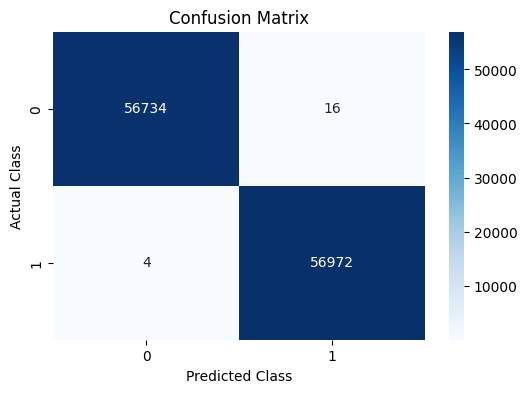

In [31]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [32]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [33]:
import pickle

# Export the trained model
pickle.dump(rf_100, open('rf_100_model.pkl',"wb"))
